In [ ]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
fid = drive.ListFile({'q':"title='FYP_FINAL_DATASET2.zip'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('FYP_FINAL_DATASET2.zip')

In [ ]:
!unzip FYP_FINAL_DATASET2.zip

Streaming output truncated to the last 5000 lines.
  inflating: FYP_FINAL_DATASET/PAPER/R_6584.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6585.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6586.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6587.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6588.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6589.jpg  
 extracting: FYP_FINAL_DATASET/PAPER/R_6590.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6591.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6592.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6593.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6594.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6595.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6596.jpg  
 extracting: FYP_FINAL_DATASET/PAPER/R_6597.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6598.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6599.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6600.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6601.jpg  
  inflating: FYP_FINAL_DATASET/PAPER/R_6602.jpg  

In [ ]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from keras.applications import InceptionV3
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam

In [ ]:
TF_model=InceptionV3(weights='imagenet',include_top=False) #imports the InceptionV3 model and discards the last 1000 neuron layer.

x=TF_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
prediction=Dense(12,activation='softmax')(x) #final layer with softmax activation


87916544/87910968 [==============================] - 8s 0us/step


In [ ]:
model=Model(inputs=TF_model.input,outputs=prediction)

In [ ]:
for i,layer in enumerate(model.layers):
  print(i,layer.name)

0 input_1
1 conv2d_1
2 batch_normalization_1
3 activation_1
4 conv2d_2
5 batch_normalization_2
6 activation_2
7 conv2d_3
8 batch_normalization_3
9 activation_3
10 max_pooling2d_1
11 conv2d_4
12 batch_normalization_4
13 activation_4
14 conv2d_5
15 batch_normalization_5
16 activation_5
17 max_pooling2d_2
18 conv2d_9
19 batch_normalization_9
20 activation_9
21 conv2d_7
22 conv2d_10
23 batch_normalization_7
24 batch_normalization_10
25 activation_7
26 activation_10
27 average_pooling2d_1
28 conv2d_6
29 conv2d_8
30 conv2d_11
31 conv2d_12
32 batch_normalization_6
33 batch_normalization_8
34 batch_normalization_11
35 batch_normalization_12
36 activation_6
37 activation_8
38 activation_11
39 activation_12
40 mixed0
41 conv2d_16
42 batch_normalization_16
43 activation_16
44 conv2d_14
45 conv2d_17
46 batch_normalization_14
47 batch_normalization_17
48 activation_14
49 activation_17
50 average_pooling2d_2
51 conv2d_13
52 conv2d_15
53 conv2d_18
54 conv2d_19
55 batch_normalization_13
56 batch_norma

In [ ]:
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True

In [ ]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow_from_directory('/content/FYP_FINAL_DATASET',
                                                 target_size=(299,299),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 10877 images belonging to 12 classes.


In [ ]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator,
                   steps_per_epoch=step_size_train,
                   epochs=10)

Epoch 1/10
110/339 [========>.....................] - ETA: 5:29 - loss: 0.9193 - accuracy: 0.7173

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


339/339 [==============================] - 439s 1s/step - loss: 0.8335 - accuracy: 0.7373
Epoch 2/10
339/339 [==============================] - 415s 1s/step - loss: 0.6161 - accuracy: 0.8058
Epoch 3/10
339/339 [==============================] - 416s 1s/step - loss: 0.5118 - accuracy: 0.8365
Epoch 4/10
339/339 [==============================] - 417s 1s/step - loss: 0.4347 - accuracy: 0.8633
Epoch 5/10
339/339 [==============================] - 416s 1s/step - loss: 0.3674 - accuracy: 0.8846
Epoch 6/10
339/339 [==============================] - 407s 1s/step - loss: 0.3362 - accuracy: 0.8929
Epoch 7/10
339/339 [==============================] - 402s 1s/step - loss: 0.2674 - accuracy: 0.9139
Epoch 8/10
339/339 [==============================] - 402s 1s/step - loss: 0.2565 - accuracy: 0.9165
Epoch 9/10
339/339 [==============================] - 402s 1s/step - loss: 0.2162 - accuracy: 0.9289
Epoch 10/10
339/339 [==============================] - 403s 1s/step - loss: 0.1898 - accuracy: 0.9390


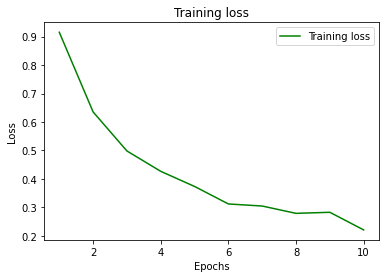

In [ ]:
loss_train = history.history['loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:

model.save("FYP_TF_INCEPTIONV3_FINAL.h5")

In [ ]:
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'


CATEGORIES=["BATTERY","BULBS","CARDBOARD","CIGARETTES","DIAPERS","MEDICINE_BOTTLES","PAPER","PAPER_CUPS","PESTICIDE_BOTTLES","PLASTIC_BAGS","PLASTIC_BOTTLES","PLASTIC_WRAPPERS"]


IMG_SIZE = 299
img_array1 = cv2.imread('/content/Non_Plastic.jpg')
img_array1=img_array1 / 255.0
new_array1 = cv2.resize(img_array1,(IMG_SIZE,IMG_SIZE))
b,g,r=cv2.split(new_array1)
new_array1=cv2.merge([r,g,b])
X = new_array1.reshape([-1,IMG_SIZE,IMG_SIZE,3])
        
    
    
model1=keras.models.load_model("/content/FYP_TF_INCEPTIONV3_FINAL.h5")

prediction = model1.predict(X)
Plastic=prediction[0,5]+prediction[0,8]+prediction[0,9]+prediction[0,10]+prediction[0,11]
Non_Plastic=prediction[0,0]+prediction[0,1]+prediction[0,2]+prediction[0,3]+prediction[0,4]+prediction[0,6]+prediction[0,7]
print(prediction)
if (Plastic>Non_Plastic):
  print(Plastic)
  print("Plastic")
else:
  print(Non_Plastic)
  print("Non_Plastic")


[[5.4890365e-06 1.5297273e-06 5.4819304e-01 3.5088800e-07 1.5651236e-05
  8.7935994e-08 4.5073611e-01 2.3598284e-04 1.0608082e-06 8.0002839e-04
  7.9760575e-06 2.6825078e-06]]
0.9991882
Non_Plastic


In [ ]:
print(prediction)